## Imports + Setup

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import sys

sys.path.append("../")

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cortex

Set random seed:

In [10]:
seed = 0

## Inspect NSD fMRI data

Load dataset

In [11]:
sys.path.append("../neurometry/rep_metrics/")

from benchmarks import NSDBenchmark

target_regions = ["EVC", "OTC"]

combined_response_data = []
combined_metadata = []


for region in target_regions:
    benchmark = NSDBenchmark(*f"shared1000_{region}-only".split("_"))

    response_data = benchmark.response_data.copy()
    voxel_metadata = benchmark.metadata.copy()

    combined_response_data.append(response_data)
    combined_metadata.append(voxel_metadata)

response_data = pd.concat(combined_response_data).drop_duplicates()
voxel_metadata = pd.concat(combined_metadata).drop_duplicates()
stimulus_data = benchmark.stimulus_data

functional_rois = benchmark.functional_rois

Now loading the shared1000 image set and the EVC-only voxel set...
Now loading the shared1000 image set and the OTC-only voxel set...


### Stimulus image information

There are 1000 stimulus images
Image description: f["A brown dog with a smile on it's face standing on a dirty ground.", 'A dog happily sitting in the sand tail wagging', 'a dog sitting up looking into a camera', 'A dog sitting in the grass looking up.', 'A dog smiling looking up at the camera.']


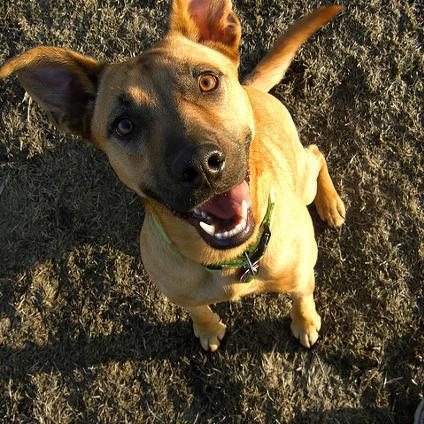

In [18]:
print(f"There are {stimulus_data.shape[0]} stimulus images")

stimulus_id = 797

print(f"Image description: f{stimulus_data.loc[stimulus_id]['coco_captions']}")
benchmark.get_stimulus(stimulus_id)

### fMRI voxel metadata

In [20]:
voxel_metadata

,subj_id,ncsnr,EVC,early,ventral,midventral,lateral,midlateral,parietal,midparietal,...,FFA-2,OFA,EBA,FBA-1,FBA-2,OPA,PPA,VWFA-1,VWFA-2,OWFA
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,1,0.248737,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-22-11-35,1,0.159338,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-22-12-33,1,0.145336,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-23-10-33,1,0.054892,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-23-10-34,1,0.172727,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S7-69-32-38,7,0.372039,NaN,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S7-69-33-38,7,0.311678,NaN,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S7-70-30-35,7,0.207324,NaN,0,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### fMRI response data

In [21]:
print(
    f"There are {response_data.shape[0]} voxels recorded on {response_data.shape[1]} stimulus images"
)
response_data.head()

There are 42384 voxels recorded on 1000 stimulus images


,584,605,625,650,1308,1625,1877,2270,2349,2372,...,575701,575971,576011,576749,576789,577817,577964,578169,579906,580813
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,0.752486,-0.297966,-0.108485,0.027122,0.574349,-0.922022,0.244273,-0.129998,-0.156549,-0.097647,...,0.811811,0.334647,0.576700,-0.051925,0.960291,1.350665,0.745355,-0.587113,-1.248250,-0.684790
S1-22-11-35,-0.103754,0.244961,0.504785,-0.929686,-1.126533,-0.101796,-0.451838,-1.169137,-0.005067,0.310044,...,1.485696,0.213420,1.042587,-0.898903,-0.055290,0.927589,0.634646,0.320112,0.194043,-1.279413
S1-22-12-33,-0.569562,0.082608,0.327680,0.350439,-0.775774,-0.040204,-0.336788,-0.033517,0.059881,0.033386,...,-0.042141,0.052800,0.480060,0.420772,0.358667,0.415686,0.425214,0.281323,-0.422511,-0.626106
S1-23-10-33,0.802062,0.366396,-0.060212,0.717037,-0.578445,0.318957,0.177282,-0.390726,0.566761,0.003886,...,-0.649402,-0.205219,-0.324081,0.658013,0.643523,0.038668,0.335630,-0.877173,-1.218459,-0.321058
S1-23-10-34,0.267148,-0.457386,1.764591,-0.621412,0.296390,-0.758162,-0.369534,-0.403290,-0.816647,-0.263991,...,1.237165,0.443143,1.142742,-0.467000,0.029254,0.263533,0.857254,0.607774,-0.189726,-1.609570


### Organize fMRI voxel responses based on subject & functional region in dict 'neural_data':

get subject ids

In [22]:
subject_ids = voxel_metadata["subj_id"].unique()
print(subject_ids)

[1 2 5 7]


In [23]:
neural_data = {}
for subject_id in subject_ids:
    subject_neural_data = {}
    subject_dataframe = voxel_metadata[voxel_metadata["subj_id"] == subject_id]
    for region in functional_rois:
        region_voxel_idxs = subject_dataframe[subject_dataframe[region] == True].index
        subject_neural_data[region] = response_data.loc[region_voxel_idxs]
        print(
            f"Subject {subject_id} has {len(subject_neural_data[region])} voxels in region {region}"
        )
    neural_data[subject_id] = subject_neural_data

Subject 1 has 594 voxels in region V1v
Subject 1 has 756 voxels in region V1d
Subject 1 has 832 voxels in region V2v
Subject 1 has 598 voxels in region V2d
Subject 1 has 646 voxels in region V3v
Subject 1 has 540 voxels in region V3d
Subject 1 has 684 voxels in region hV4
Subject 1 has 418 voxels in region FFA-1
Subject 1 has 211 voxels in region FFA-2
Subject 1 has 269 voxels in region OFA
Subject 1 has 2525 voxels in region EBA
Subject 1 has 333 voxels in region FBA-1
Subject 1 has 313 voxels in region FBA-2
Subject 1 has 1173 voxels in region OPA
Subject 1 has 734 voxels in region PPA
Subject 1 has 662 voxels in region VWFA-1
Subject 1 has 355 voxels in region VWFA-2
Subject 1 has 359 voxels in region OWFA
Subject 2 has 543 voxels in region V1v
Subject 2 has 555 voxels in region V1d
Subject 2 has 610 voxels in region V2v
Subject 2 has 450 voxels in region V2d
Subject 2 has 563 voxels in region V3v
Subject 2 has 529 voxels in region V3d
Subject 2 has 482 voxels in region hV4
Subject 

### Visualize activity on cortex

In [174]:
import nibabel as nib

nsd_path = "/scratch/facosta/NSD"


def get_subj_dims(subj):
    fn = f"{nsd_path}/nsddata/ppdata/{subj}/func1pt8mm/mean.nii.gz"
    return nib.load(fn).get_fdata().shape


subj = "subj01"
space = "func1pt8mm"
xfm = "func1pt8_to_anat0pt8_autoFSbbr"
beta_version = "betas_fithrf_GLMdenoise_RR"

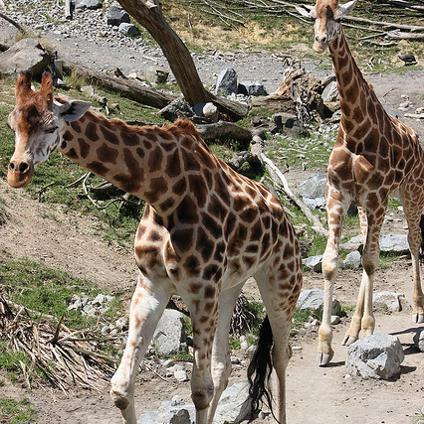

In [194]:
stimulus_id = 59
subject_id = 1
image_id = str(stimulus_data.loc[stimulus_id]["image_id"])

volumetric_data = np.zeros(get_subj_dims(subj))
volumetric_data[:] = np.nan


for region in functional_rois:
    response = neural_data[subject_id][region]
    for row_i, row in response.iterrows():
        _, x, y, z = row_i.split("-")
        x, y, z = int(x), int(y), int(z)
        volumetric_data[x, y, z] = response.loc[row_i][image_id]


voxel_data = volumetric_data

benchmark.get_stimulus(stimulus_id)

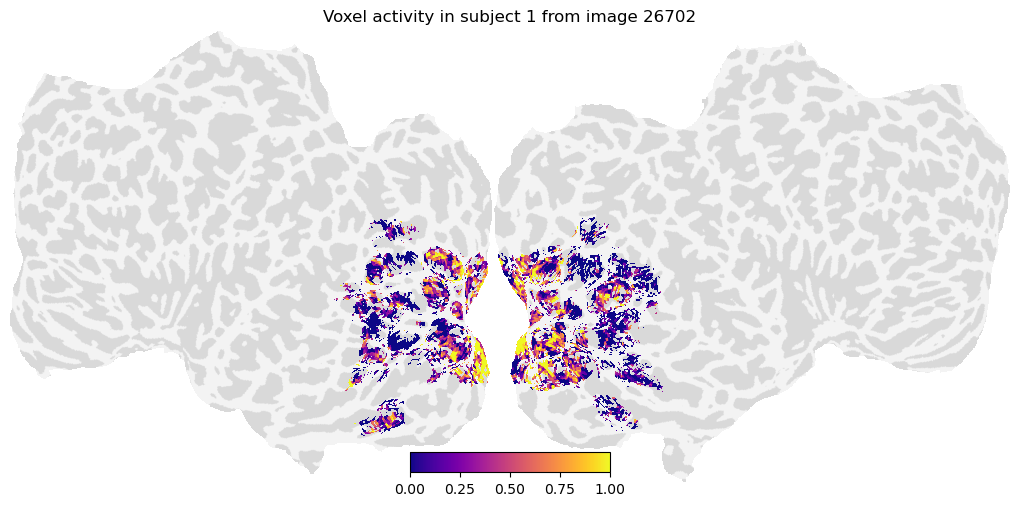

In [196]:
import neurometry.rep_metrics.viz as viz

# Generate the plot_data and fig using plot_ROI_flatmap function
volume, fig = viz.plot_ROI_flatmap(
    voxel_data,
    subj,
    figsize=(10, 5),
    cmap="plasma",
    vmin=0,
    vmax=1.0,  # rois = True,
    title=f"Voxel activity in subject {subject_id} from image {image_id}",
)

brain_plot = viz.convert_figure_to_image(fig)

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Test', ylabel='Score'>

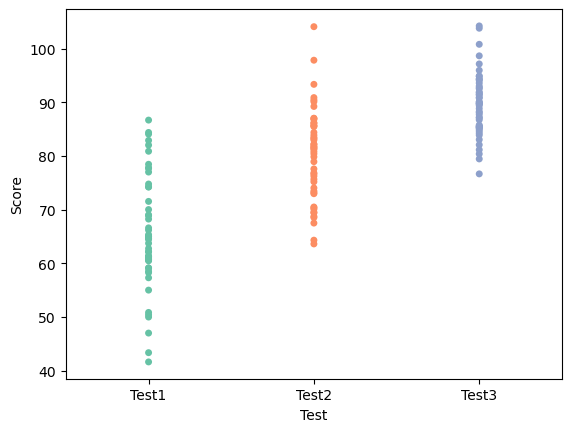

In [6]:
import seaborn as sns
import pandas as pd
import random

# Sample data
tests = ['Test1', 'Test2', 'Test3']
scores = [random.gauss(70, 10) for _ in range(50)] + \
         [random.gauss(80, 8) for _ in range(50)] + \
         [random.gauss(90, 5) for _ in range(50)]
test_labels = ['Test1']*50 + ['Test2']*50 + ['Test3']*50

# Create a DataFrame
df = pd.DataFrame({
    'Test': test_labels,
    'Score': scores
})

# Create the strip plot
sns.stripplot(x='Test', y='Score', data=df, jitter=False, palette="Set2")

# Create the swarm plot
#sns.swarmplot(x='Test', y='Score', data=df, palette="Set2")

## Anatomical Geometry of Visual Cortex

In [6]:
otc_rois = [
    "FFA-1",
    "FFA-2",
    "OFA",
    "EBA",
    "FBA-1",
    "FBA-2",
    "OPA",
    "PPA",
    "VWFA-1",
    "VWFA-2",
    "OWFA",
]

In [2]:
subject = "subj01"

surfs = [cortex.polyutils.Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")]

left, right = surfs

In [3]:
def ids_from_hemi_to_roi(hemi_ids, pt_id, hemi="left"):
    return list(hemi_ids).index(pt_id)


def ids_from_roi_to_hemi(hemi_ids, pt_id, hemi="left"):
    return hemi_ids[pt_id]

In [15]:
from neurometry.rep_metrics.anatomy import get_roi_vertices

left_rois_vertices, right_rois_vertices = get_roi_vertices("subj01", otc_rois)

roi_pts_ids = left_rois_vertices["PPA"]
roi_pts = left.pts[roi_pts_ids]

# ROI polys in hemisphere indices
roi_polys = [
    face
    for face in left.polys
    if (face[0] in roi_pts_ids and face[1] in roi_pts_ids and face[2] in roi_pts_ids)
]

# ROI polys in ROI indices
roi_polys_in_roi = [
    (
        ids_from_hemi_to_roi(roi_pts_ids, face[0]),
        ids_from_hemi_to_roi(roi_pts_ids, face[1]),
        ids_from_hemi_to_roi(roi_pts_ids, face[2]),
    )
    for face in roi_polys
]

In [8]:
roi_surface = cortex.utils.Surface(pts=roi_pts, polys=np.array(roi_polys_in_roi))

In [16]:
vertex_mask = cortex.get_roi_verts("subj01", roi="PPA", mask=True)
roi_surface = left.create_subsurface(vertex_mask=vertex_mask["PPA"])

In [28]:
roi_pts_ids.shape

(2156,)

In [33]:
len(roi_surface.pts)

2150

In [25]:
indices = cortex.get_roi_verts("subj01", roi="PPA", mask=False)

In [34]:
len(left_rois_vertices["PPA"])

2156

In [30]:
len(left_rois_vertices["PPA"]) + len(right_rois_vertices["PPA"])

3891

In [27]:
indices["PPA"].shape

(3891,)

In [17]:
n_points = len(roi_surface.pts)
dists = np.zeros((n_points, n_points))
for point_id in range(n_points):
    row = roi_surface.geodesic_distance(verts=[point_id])
    dists[point_id, :] = row


squared_dists = np.square(dists)

sum_squared_dists = np.sum(squared_dists, axis=0)

frechet_mean_id = np.argmin(sum_squared_dists)

frechet_mean_id_left = ids_from_roi_to_hemi(roi_pts_ids, frechet_mean_id)


print(frechet_mean_id_left)
frechet_mean_id_left in roi_pts_ids

/home/facosta/miniconda3/envs/neurometry/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


77732


True

Background RRGGBBAA: ffffff00
Area 0:0:2249.09:1024 exported to 2249 x 1024 pixels (96 dpi)


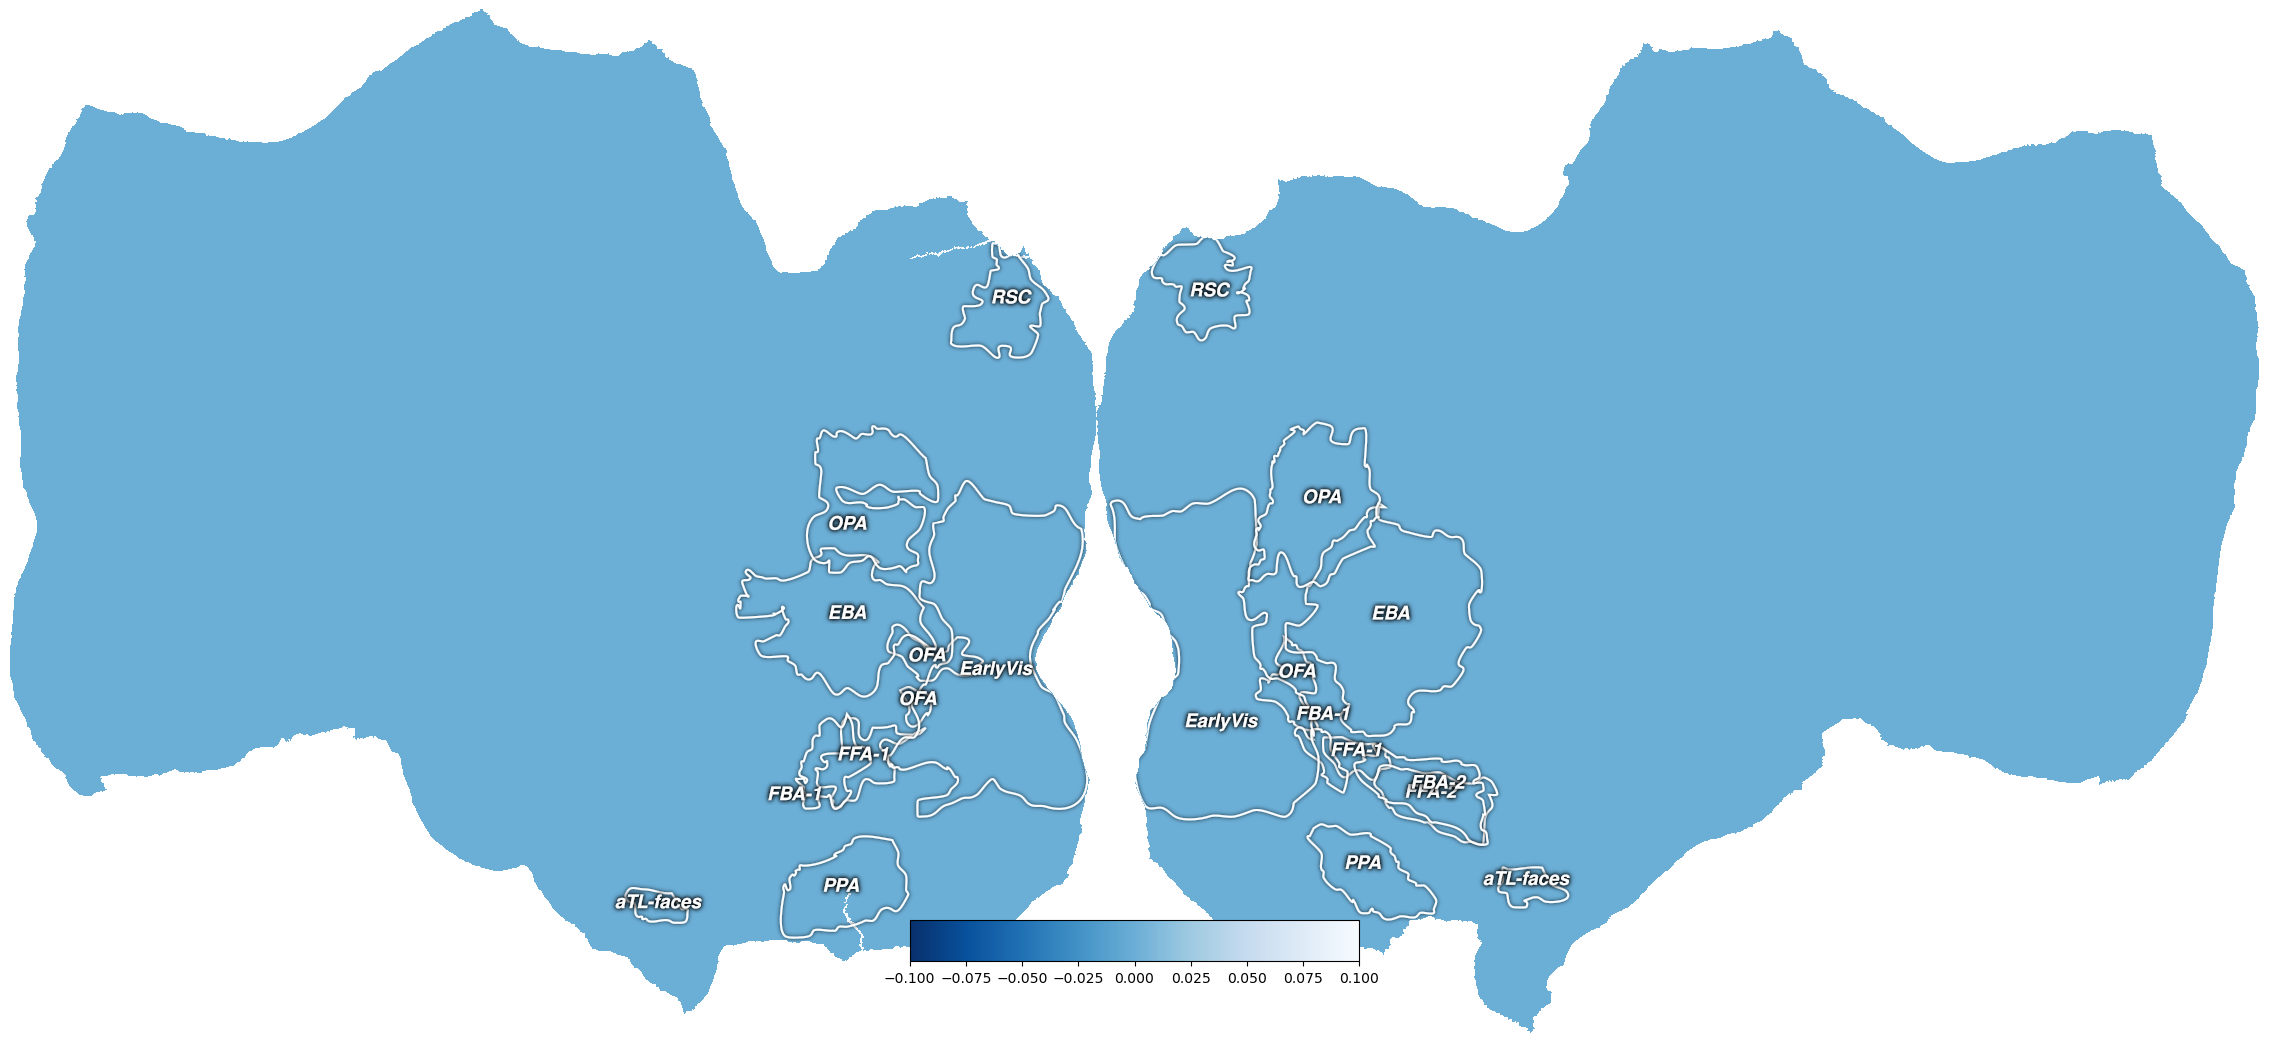

In [18]:
pt_a = frechet_mean_id_left
pt_b = 50000

# Then we find the geodesic path between these points
path = left.geodesic_path(pt_a, pt_b)
numl = left.pts.shape[0]

# In order to plot this on the cortical surface, we need an array that is the
# same size as the number of vertices in the left hemisphere
path_data = np.zeros(numl)
for v in path:
    path_data[v] = 1

# And now plot these distances onto the cortical surface
path_verts = cortex.Vertex(path_data, subject, cmap="Blues_r")
cortex.quickshow(path_verts, with_colorbar=True)
plt.show()

## Representational Similarity Analysis (RSA) 

In [137]:
from neurometry.rep_metrics.dissimilarity import compute_rsa_pairwise_dissimilarities

Compute RDMs (pearson) for all $n$ networks and compute $\frac{1}{2}n(n-1)$ pairwise dissimilarities (1-pearson)

In [138]:
import neurometry.rep_metrics.viz as viz

Parallelizing n(n-1)/2 = 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153.0 [00:00<00:00, 166.79it/s]


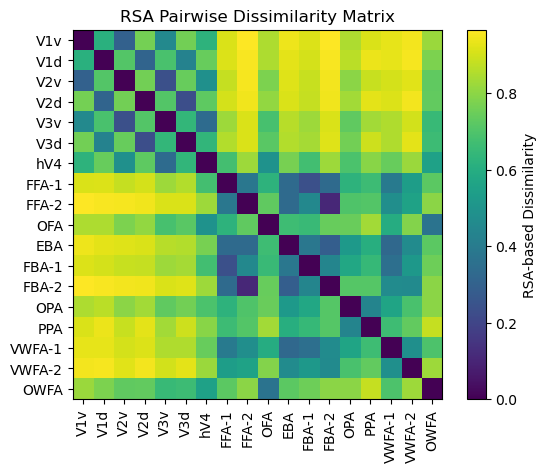

In [142]:
rsa_pairwise_dissimilarity_matrix = compute_rsa_pairwise_dissimilarities(neural_data[1])

viz.plot_pairwise_dis_matrix(rsa_pairwise_dissimilarity_matrix, functional_rois, "RSA")

In [24]:
import itertools

rdm_compute_types = ["euclidean", "pearson", "spearman", "mahalanobis", "concordance"]
rdm_compare_types = ["pearson", "spearman", "concordance"]
rsa_types = list(itertools.product(rdm_compute_types, rdm_compare_types))

In [ ]:
rsa_geometry_matrices = {}

for rsa_type in rsa_types:
    for subjects in subject_ids:
        

Find high-dimensional Euclidean embedding for RSA space that preserves pairwise distances with Multidimensional Scaling (MDS):

In [19]:
from sklearn.manifold import MDS

mds_dimensions = 100

rsa_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
rsa_mds_embedding = rsa_embedding.fit_transform(rsa_pairwise_dissimilarity_matrix)
print(f"RSA space MDS Stress = {rsa_embedding.stress_}")

RSA space MDS Stress = 0.05505033242282029


Project RSA space embeddings onto 2 principal components:

In [22]:
from neurometry.rep_metrics.dim_reduction import TorchPCA

rsa_pca = TorchPCA(n_components=2, device="cuda").fit(rsa_mds_embedding.T)
rsa_pca_mds_data = rsa_pca.get_top_n_components(n_components=2).cpu()
rsa_expl_var = rsa_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*rsa_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*rsa_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(rsa_expl_var).item():.1f}%")

PC1 explained variance = 44.9%
PC2 explained variance = 14.4%
Total 2D explained variance = 59.2%


Visualize 2D projection:

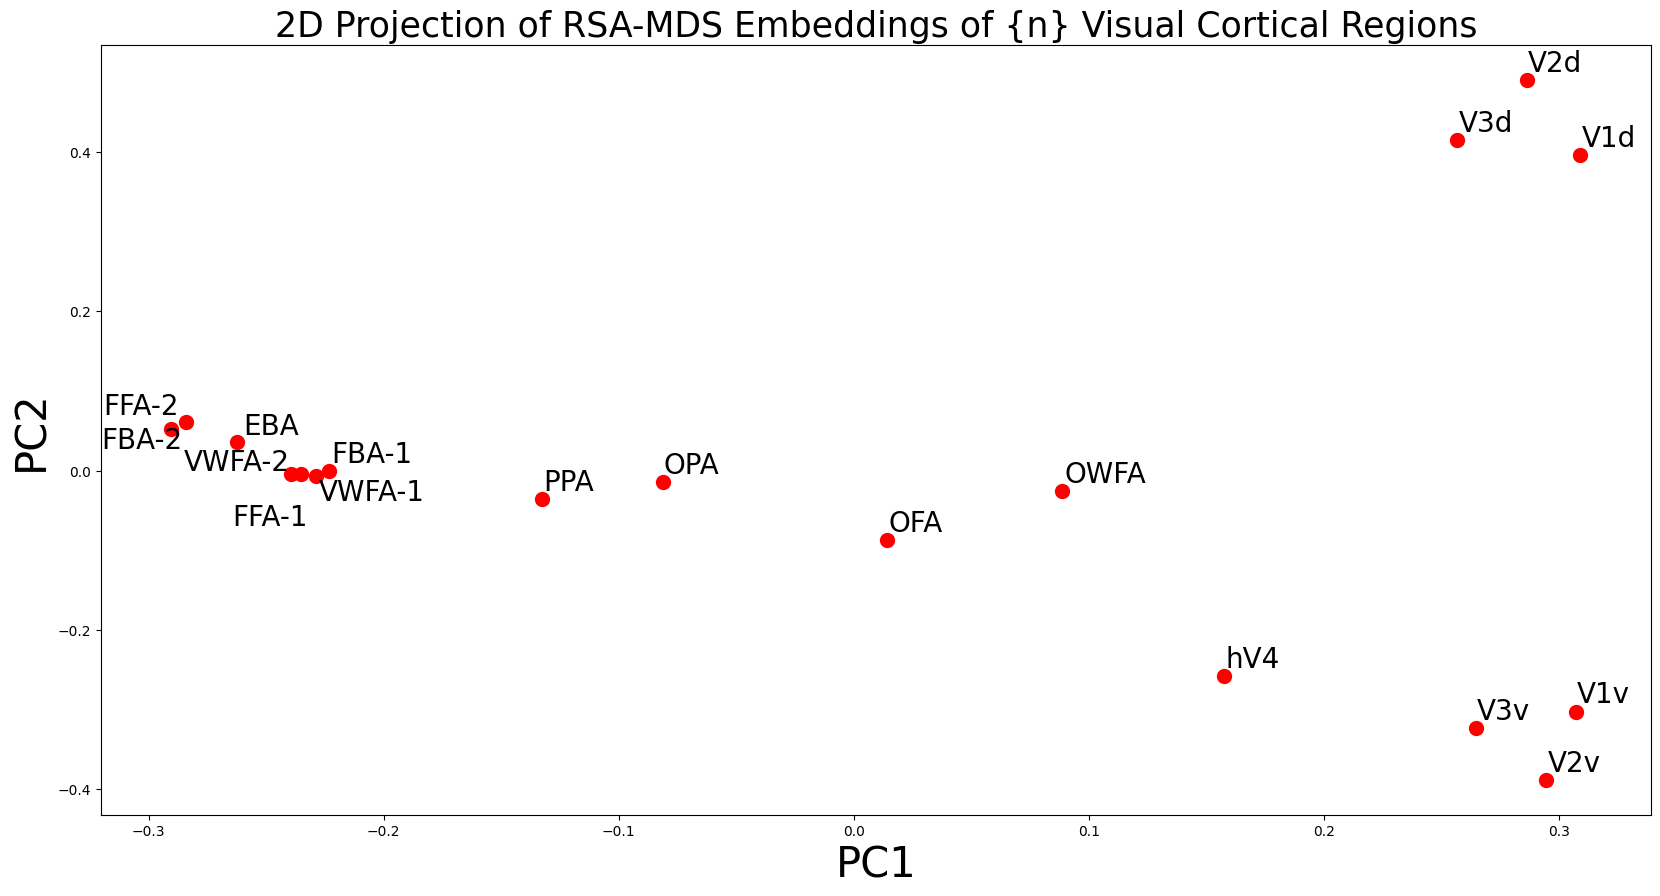

In [23]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(rsa_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    "2D Projection of RSA-MDS Embeddings of {n} Visual Cortical Regions", fontsize=25
)
plt.show();

## Principal Component Analysis (PCA) of Voxel Responses

Plot PCA eigenspectrum for one region - e.g., Human V4

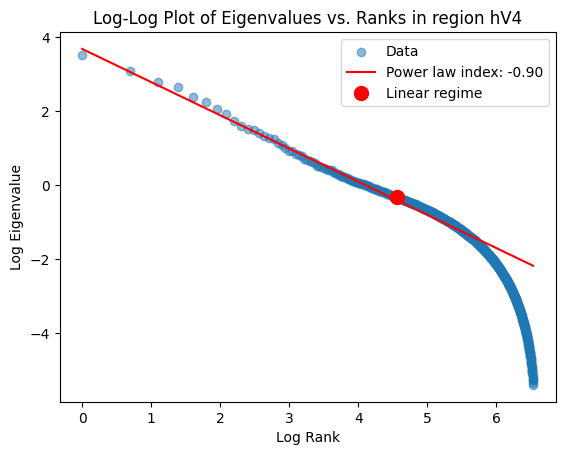

In [24]:
from neurometry.rep_metrics.dim_reduction import compute_power_law_index

region = "hV4"

slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y = compute_power_law_index(
    neural_data[region].to_numpy()
)

import viz

viz.plot_pca_spectrum(
    region, slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y
)

### Quantify geometric distortion introduced by PCA projection 

Plot cumulative variance explained ratio vs principal component dimensions

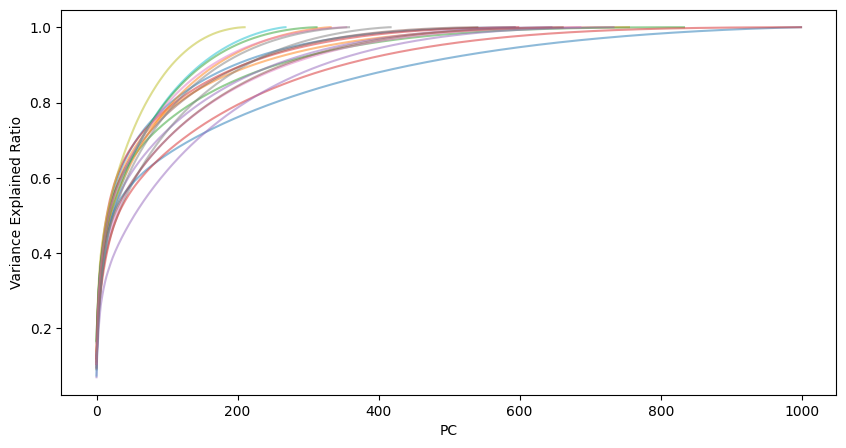

In [25]:
fig = plt.figure(figsize=(10, 5))
neural_data_region_pcas = {}
for region in functional_rois:
    pca = TorchPCA(device="cuda").fit(neural_data[region].to_numpy())
    neural_data_region_pcas[region] = pca
    plt.plot(pca.cumulative_explained_variance_ratio_.cpu(), alpha=0.5)
    plt.xlabel("PC")
    plt.ylabel("Variance Explained Ratio")

Analyze within-region pairwise-distance preservation

In [26]:
neural_data_list = [neural_data[region].to_numpy().T for region in neural_data.keys()]

In [28]:
from neurometry.rep_metrics.dim_reduction import compute_distance_preservation

corrs, stresses, all_us = compute_distance_preservation(neural_data_list)

100%|██████████| 211/211 [00:13<00:00, 15.99it/s]


correlation >= 0.95 at dim 5
stress <= 0.15 not attainable


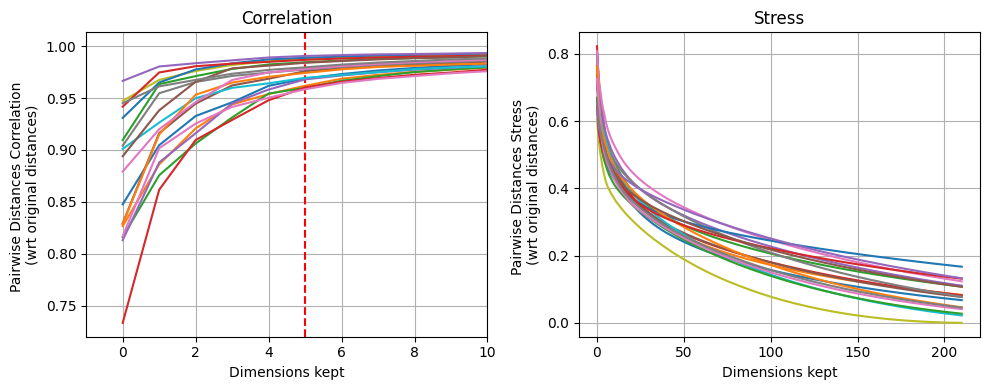

In [29]:
from neurometry.rep_metrics.dim_reduction import get_minimal_embedding

corr_reduced_neural_data, stress_reduced_neural_data = get_minimal_embedding(
    corrs, stresses, all_us, plot=True, corr_threshold=0.95, stress_threshold=0.15
)

viz.plot_pca_distortions(
    corrs, stresses, corrs_dim=corr_reduced_neural_data[0].shape[1]
)

### Perform PCA reduction with fixed n_components for all regions

In [30]:
import pandas as pd

n_components = 211

pca_reduced_neural_data = {}

for region in functional_rois:
    X = (
        neural_data_region_pcas[region]
        .get_top_n_components(n_components=n_components)
        .T
    )
    pca_reduced_neural_data[region] = pd.DataFrame(
        X.cpu(), columns=neural_data[region].columns
    )

## Compute shape-based distances between cortical networks

### Initialize metric

We choose a metric from a family of linear metrics parameterized by $\alpha \in [0,1]$, where

$\alpha = 0$ corresponds to [Canonical Correlation Analysis (CCA)](https://en.wikipedia.org/wiki/Canonical_correlation)

$\alpha = 1$ corresponds to [Procrustes distance](https://en.wikipedia.org/wiki/Procrustes_analysis)

### Compute region-region pairwise distance matrix

We have n = 18 cortical regions;
We need n(n-1)/2 = 153 distance calculations
Parallelizing 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153 [00:11<00:00, 13.80it/s]


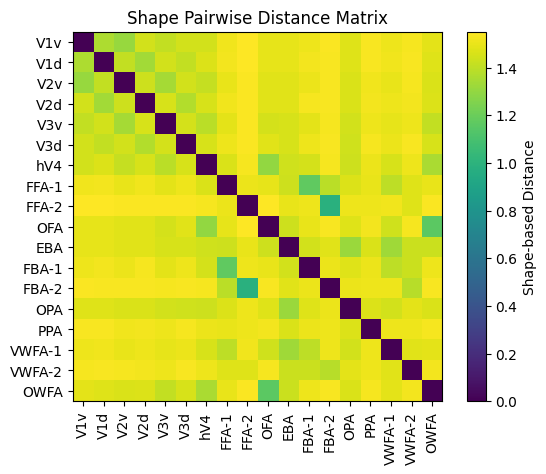

In [33]:
from neurometry.rep_metrics.dissimilarity import compute_pairwise_distances

alpha = 1  # Procrustes

pairwise_distance_matrix = compute_pairwise_distances(
    pca_reduced_neural_data, benchmark.stimulus_data, alpha=alpha
)
viz.plot_pairwise_dis_matrix(pairwise_distance_matrix, functional_rois, method="Shape")

Find high-dimensional Euclidean embedding that preserves pairwise distances with Multidimensional Scaling (MDS):

In [34]:
from sklearn.manifold import MDS

mds_dimensions = 100


shape_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
shape_mds_embedding = shape_embedding.fit_transform(pairwise_distance_matrix)

print(f"Shape Space MDS Stress = {shape_embedding.stress_}")

Shape Space MDS Stress = 0.11314267535991743


Project Shape space embeddings onto 2 principal components:

In [35]:
shape_pca = TorchPCA(n_components=2, device="cuda").fit(shape_mds_embedding.T)
shape_pca_mds_data = shape_pca.get_top_n_components(n_components=2).cpu()
shape_expl_var = shape_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*shape_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*shape_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(shape_expl_var).item():.1f}%")

PC1 explained variance = 10.6%
PC2 explained variance = 8.8%
Total 2D explained variance = 19.4%


Visualize 2D projection:

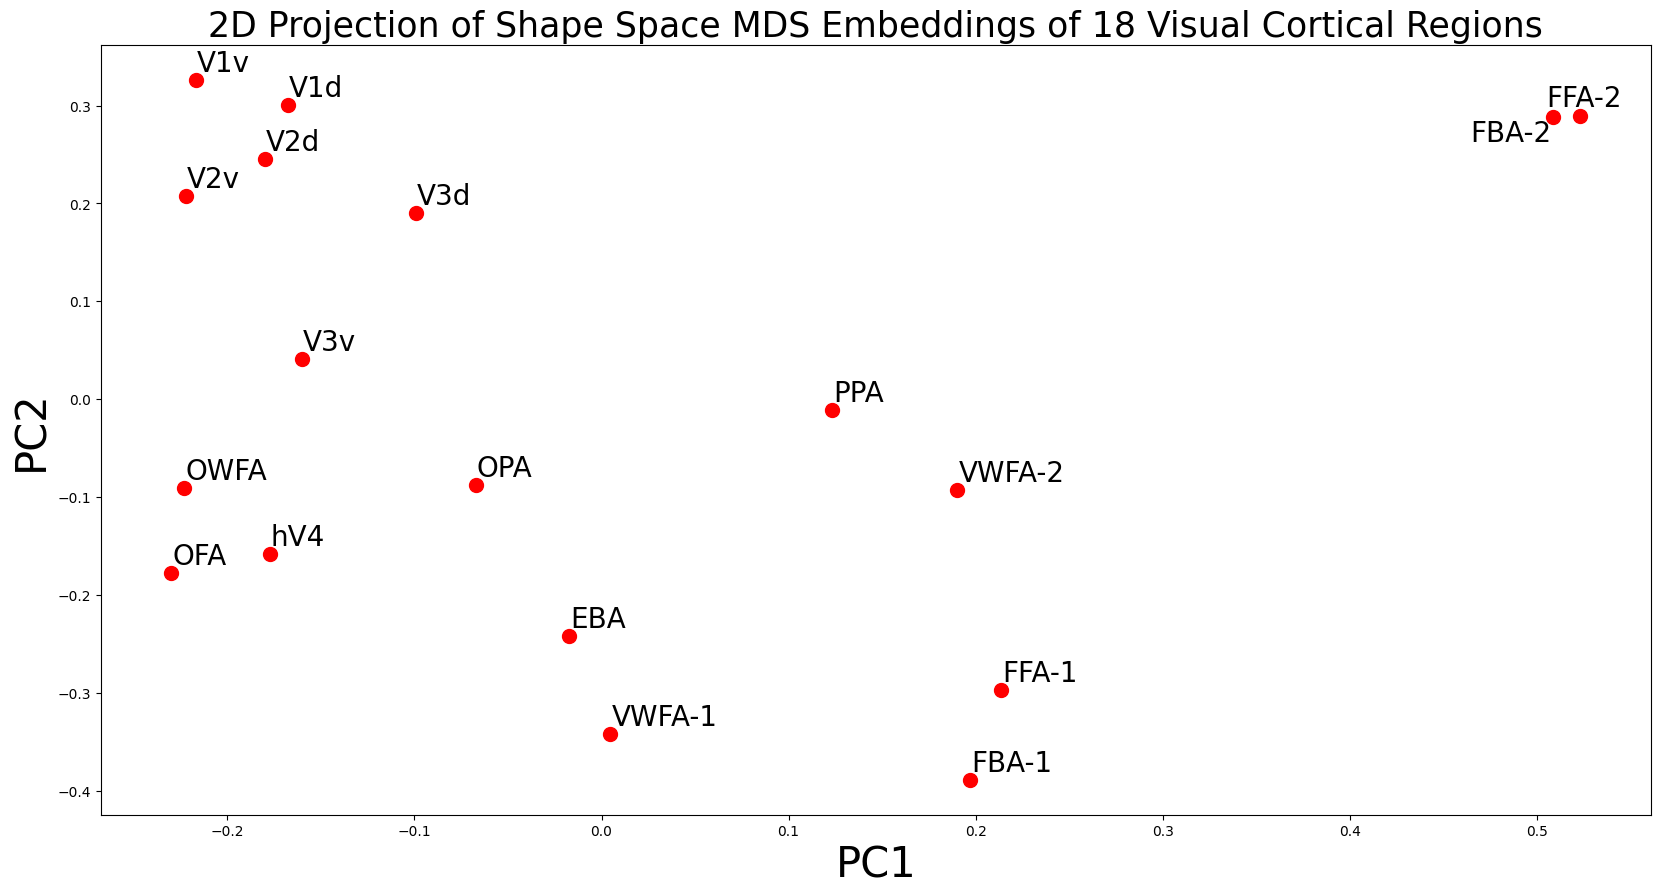

In [36]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(shape_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    f"2D Projection of Shape Space MDS Embeddings of {len(texts)} Visual Cortical Regions",
    fontsize=25,
)
plt.show();

## Load anatomical map of visual cortex

## Visualize space of networks

## Visualize shape-based network embeddings for different values of $\alpha \in [0,1]$, 'score_methods' $\in$ {'angular','euclidean'}

In [ ]:
def visualize_2d_embeddings(alpha, score_method, train_data, test_data):
    metric = LinearMetric(alpha=alpha, center_columns=True, score_method=score_method)

    os.environ["OMP_NUM_THREADS"] = "1"

    n = len(cortical_regions)
    print(f"We have n = {n} cortical regions;")
    print(f"We need n(n-1)/2 = {int((n*(n-1)/2))} distance calculations")

    D_train, D_test = metric.pairwise_distances(train_data, test_data)

    mds_dimensions = 100

    embedding = MDS(
        n_components=mds_dimensions,
        dissimilarity="precomputed",
        random_state=seed,
        normalized_stress=False,
    )
    mds_embedding = embedding.fit_transform(D_test)

    pca = TorchPCA(n_components=2, device="cuda").fit(mds_embedding.T)
    pca_mds_data = pca.get_top_n_components(n_components=2).cpu()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()

    texts = []
    for idx, (x, y) in enumerate(pca_mds_data):
        ax.scatter(x, y, color=colors[idx], label=unique_regions.index[idx], s=100)
        texts.append(plt.text(x, y, unique_regions.index[idx], fontsize=20))

    adjust_text(texts)

    ax.set_xlabel("PC1", fontsize=30)
    ax.set_ylabel("PC2", fontsize=30)
    ax.set_title(
        "2D Projection of Shape-Space Embeddings of 19 Visual Cortical Regions",
        fontsize=25,
    )
    plt.show();

### $\alpha=1$, score_method = "euclidean"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:10<00:00, 15.58it/s]


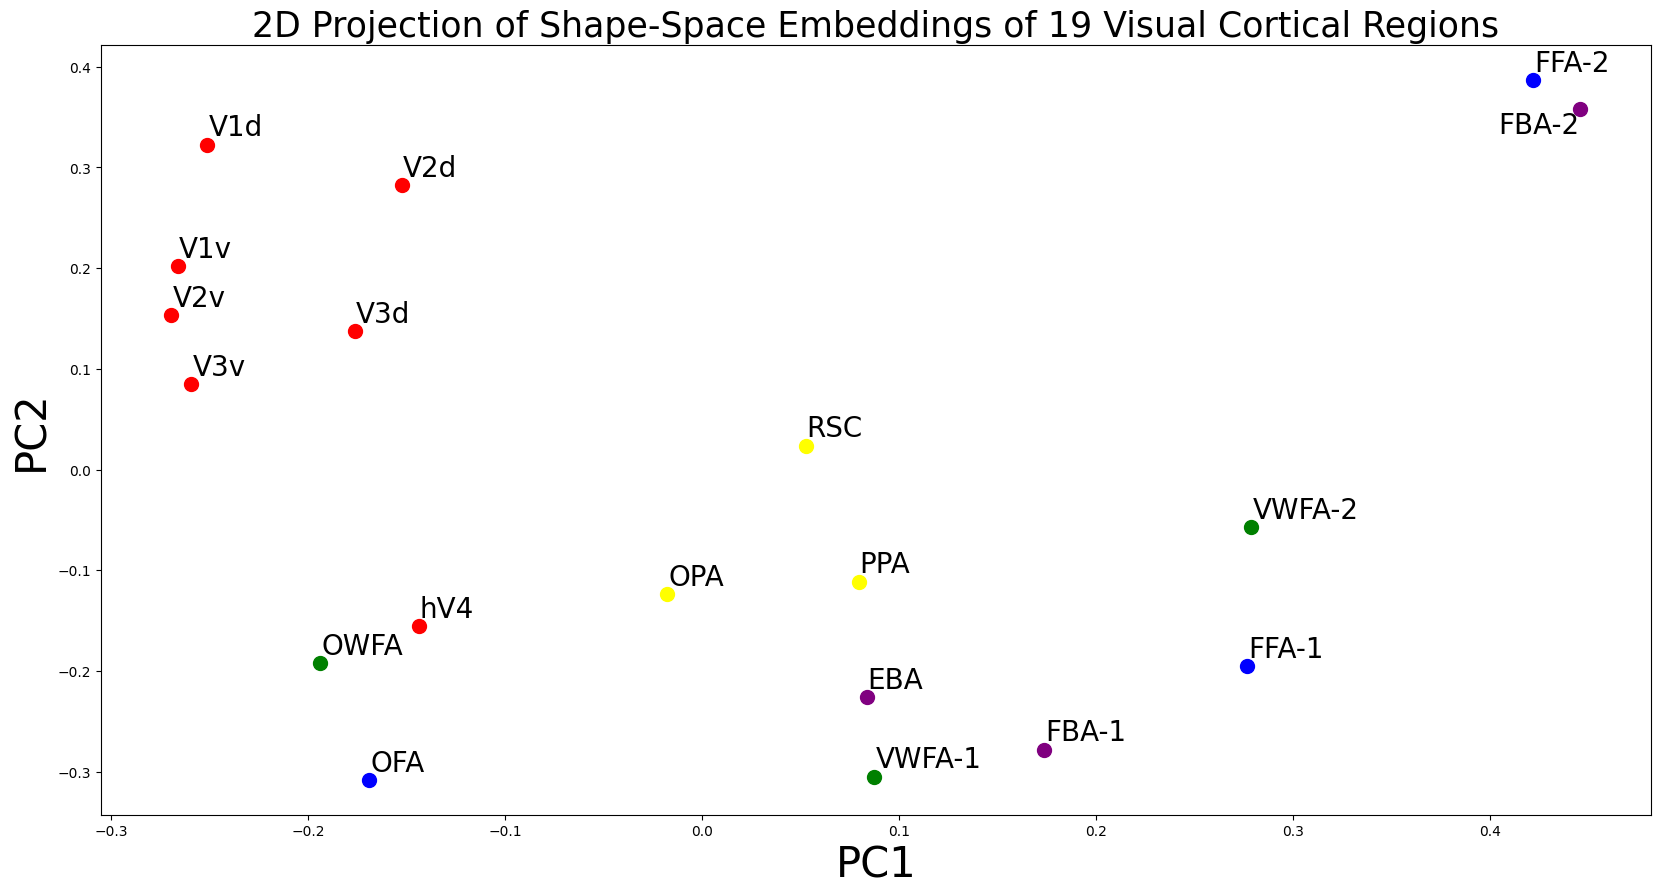

In [ ]:
visualize_2d_embeddings(
    alpha=1,
    score_method="euclidean",
    train_data=train_data,
    test_data=test_data,
)

### $\alpha=1$, score_method = "angular"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:08<00:00, 19.94it/s]


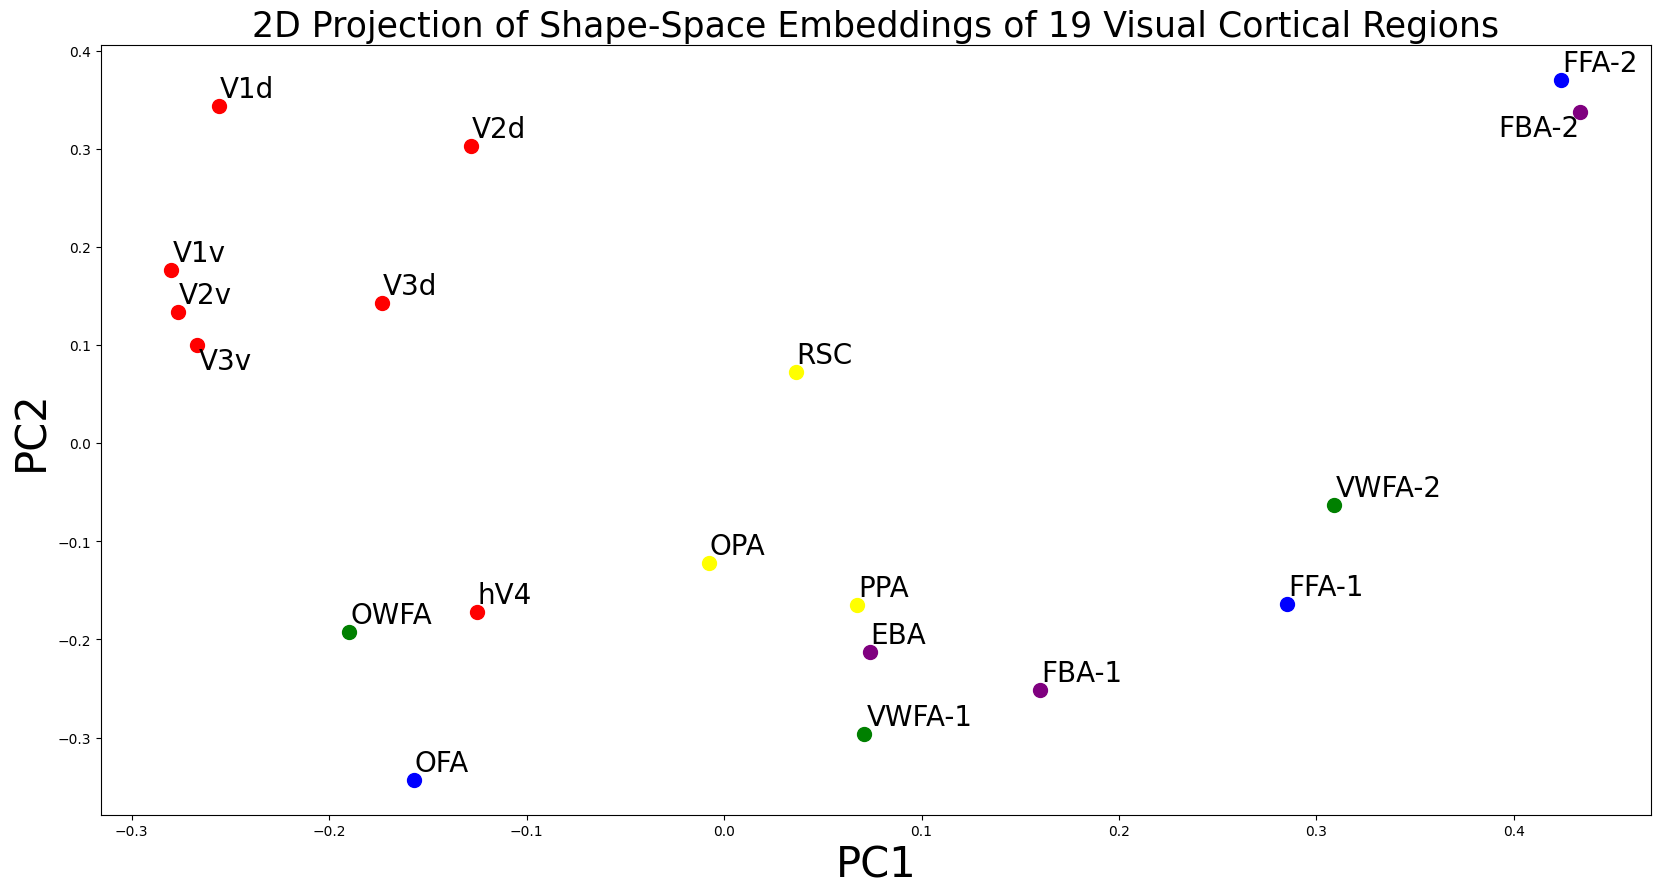

In [ ]:
visualize_2d_embeddings(
    alpha=1,
    score_method="angular",
    train_data=train_data,
    test_data=test_data,
)

### $\alpha=0.5$, score_method = "angular"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:10<00:00, 16.21it/s]


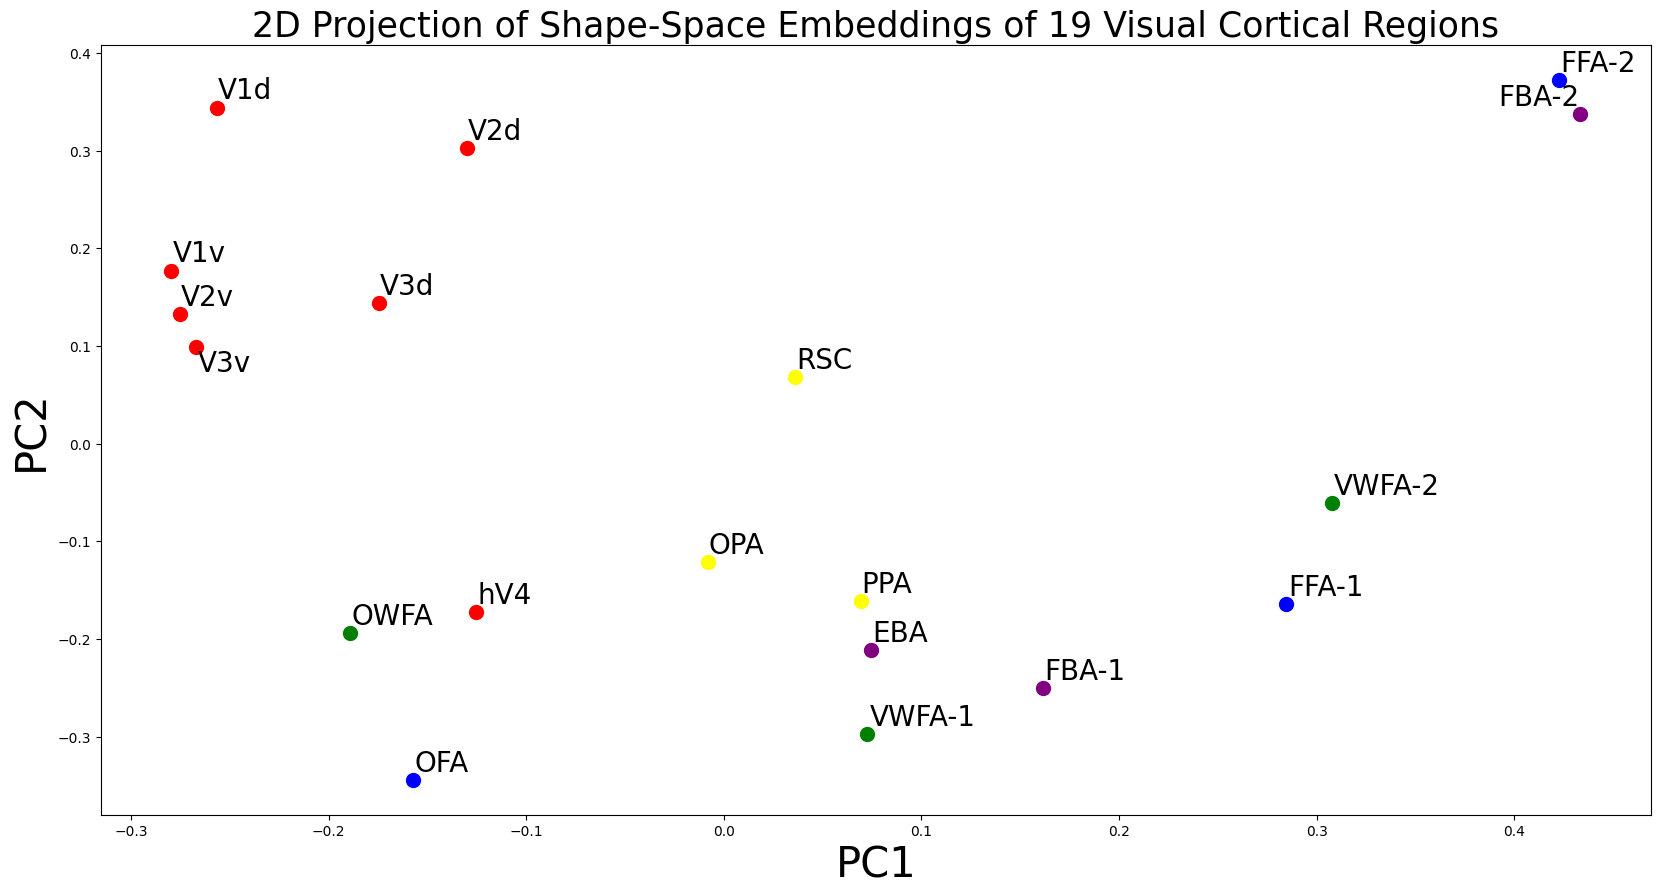

In [ ]:
visualize_2d_embeddings(
    alpha=0.5,
    score_method="angular",
    train_data=train_data,
    test_data=test_data,
)